In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/envs/work/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [11]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'planck_wgt_flux']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW',
                          'examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_8',
                          'g_descending',
                          'refPTs_P_1_T_250__P_500_T_250',
                          'ighigh_7',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all.3__all.3',
                          'bigsum',
                          'atmpro_mls_testnref')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW',
                          'examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_8',
                          'g_descending',
                          'refPTs_P_1_T_250__P_500_T_250',
                          'ighigh_7',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all.3__all.3',
                          'bigsum',
                          'atmpro_mls_testnref')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [12]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 340

nband = 200

nv = 200

dv = 0.005

tsfc = 294.0

ng = 8

nref = 2

data wgt
     &     /8 * 0.3/

planck_wgt_flux = 2

include 'mls75.pro'


In [13]:
fig.display_hrefanchor()

In [14]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [15]:
table_dgdgs.display_hrefanchor()

In [16]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [17]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [18]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate g-group 1

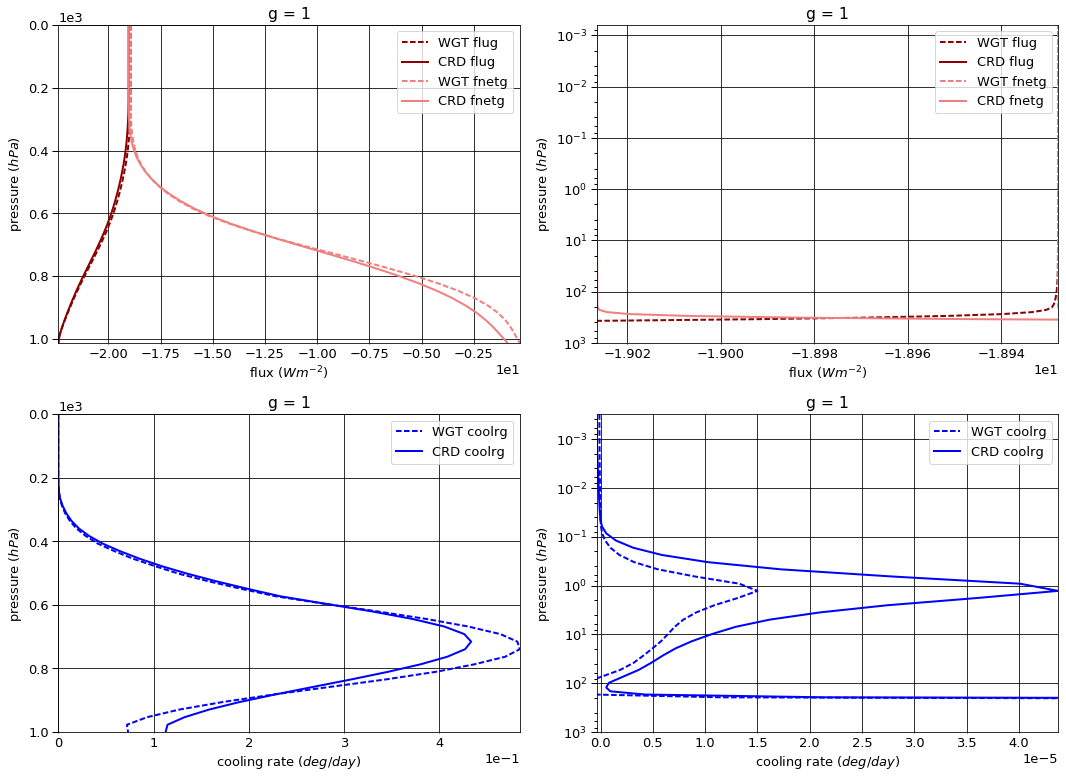

# Figure: flux, cooling rate g-group 2

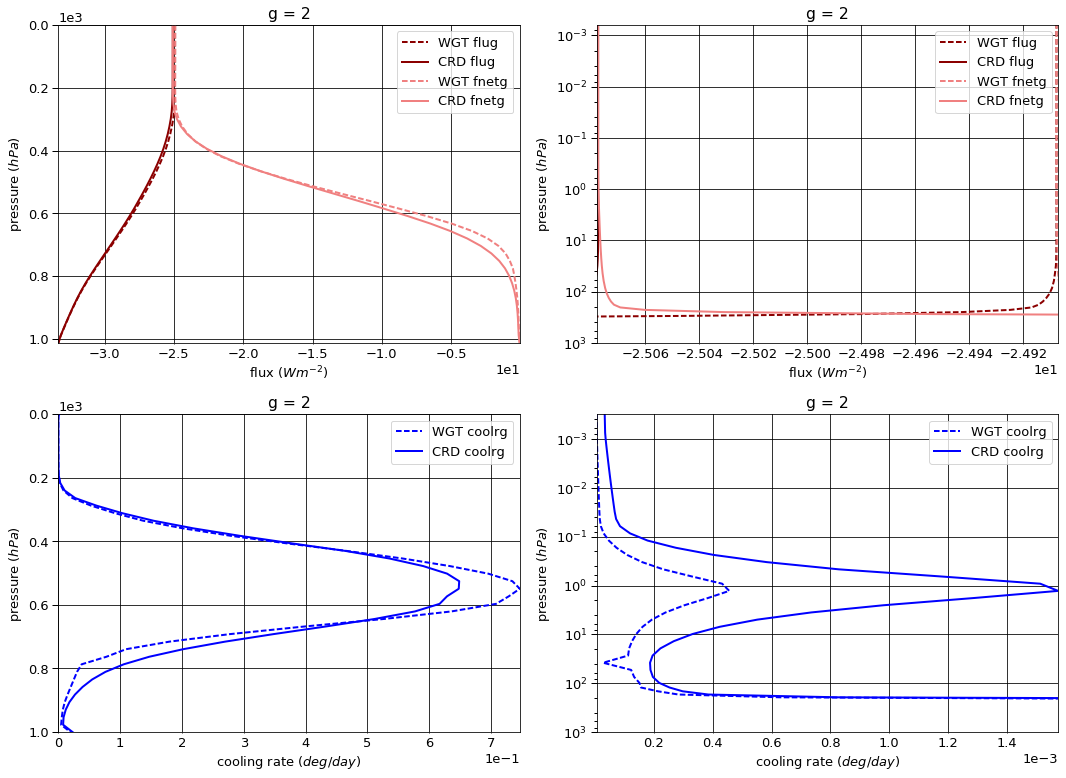

# Figure: flux, cooling rate g-group 3

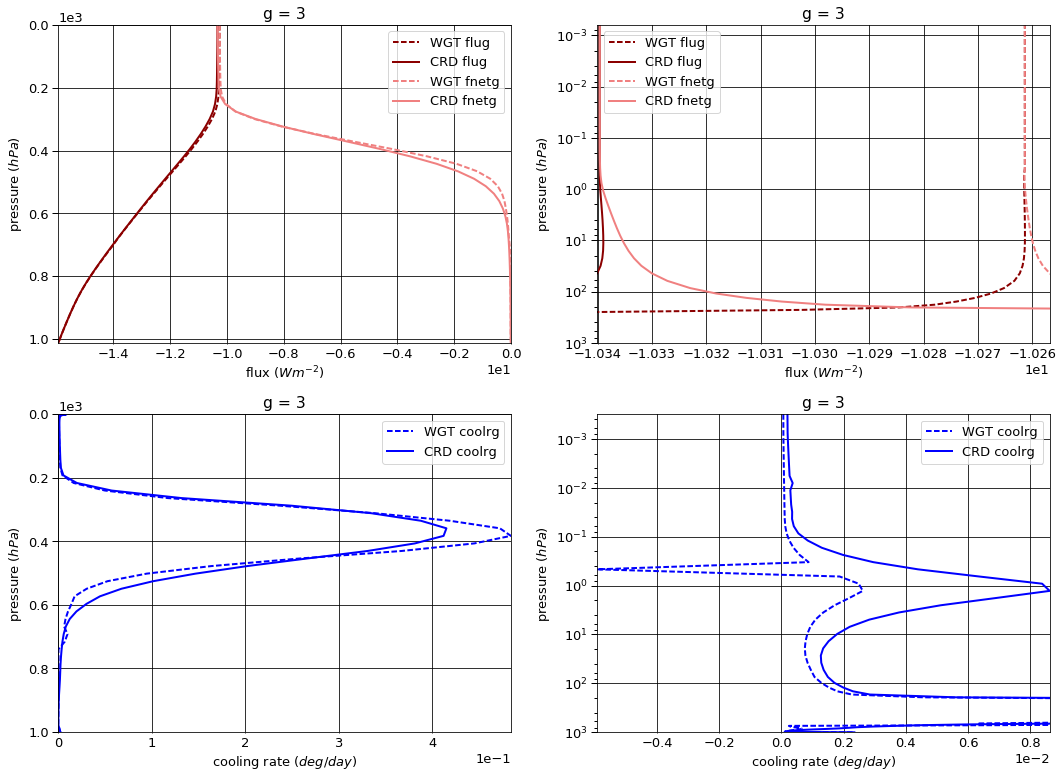

# Figure: flux, cooling rate g-group 4

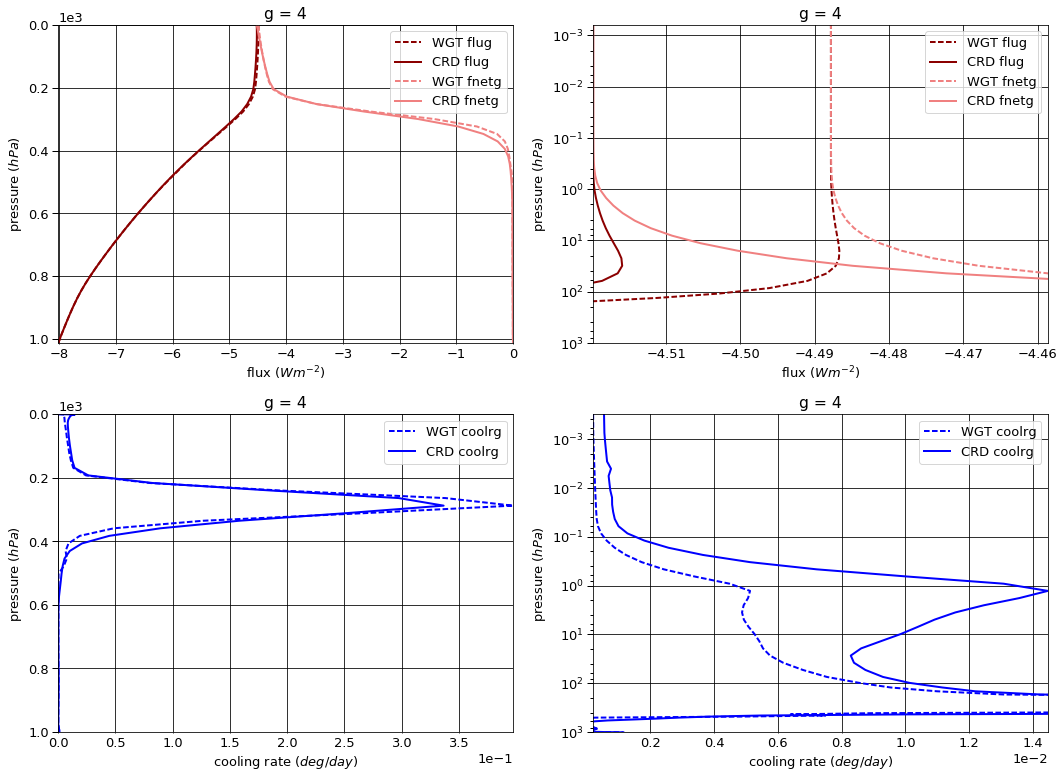

# Figure: flux, cooling rate g-group 5

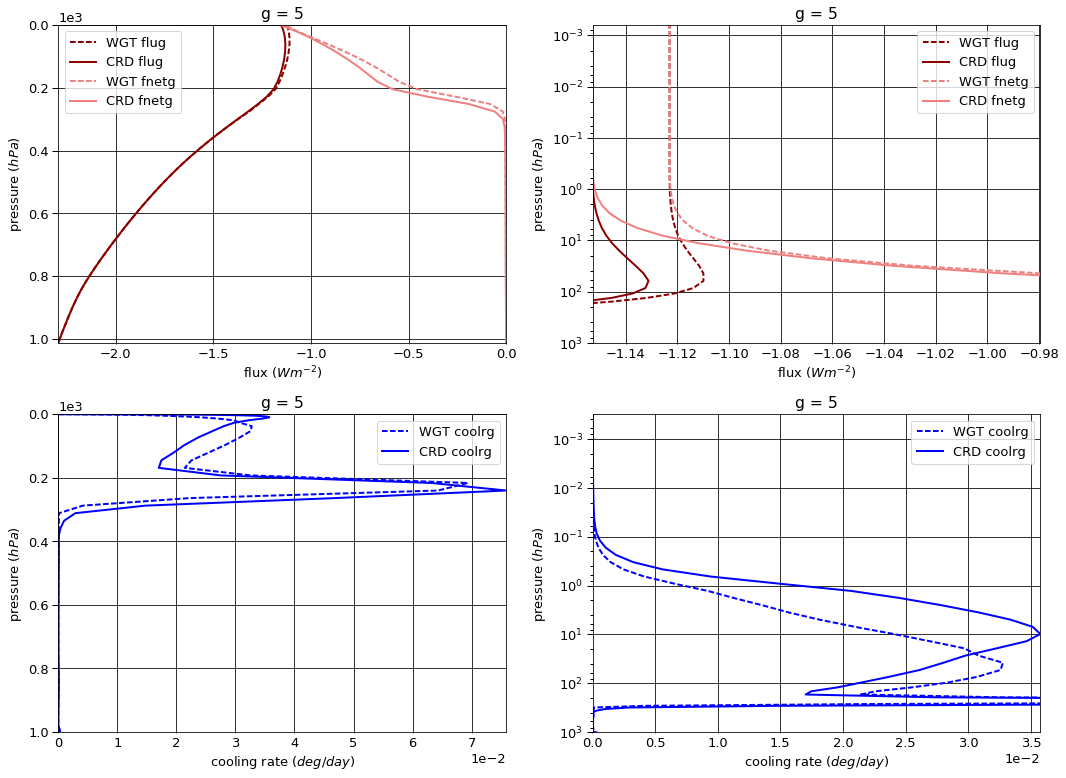

# Figure: flux, cooling rate g-group 6

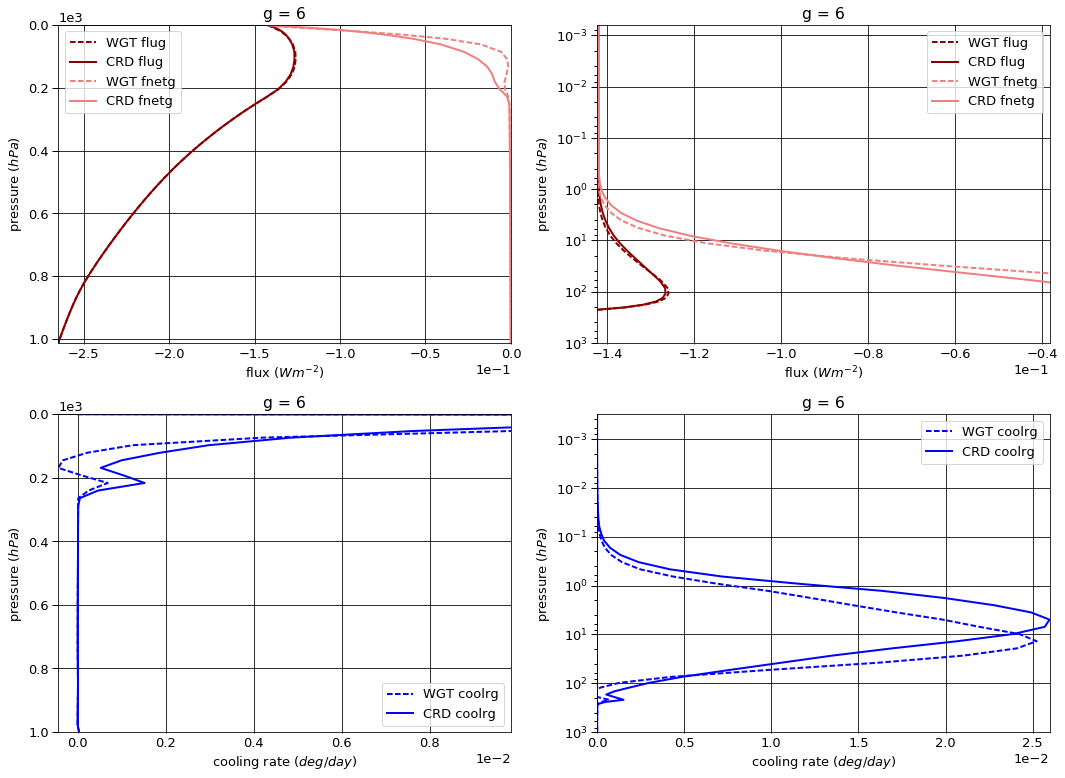

# Figure: flux, cooling rate g-group 7

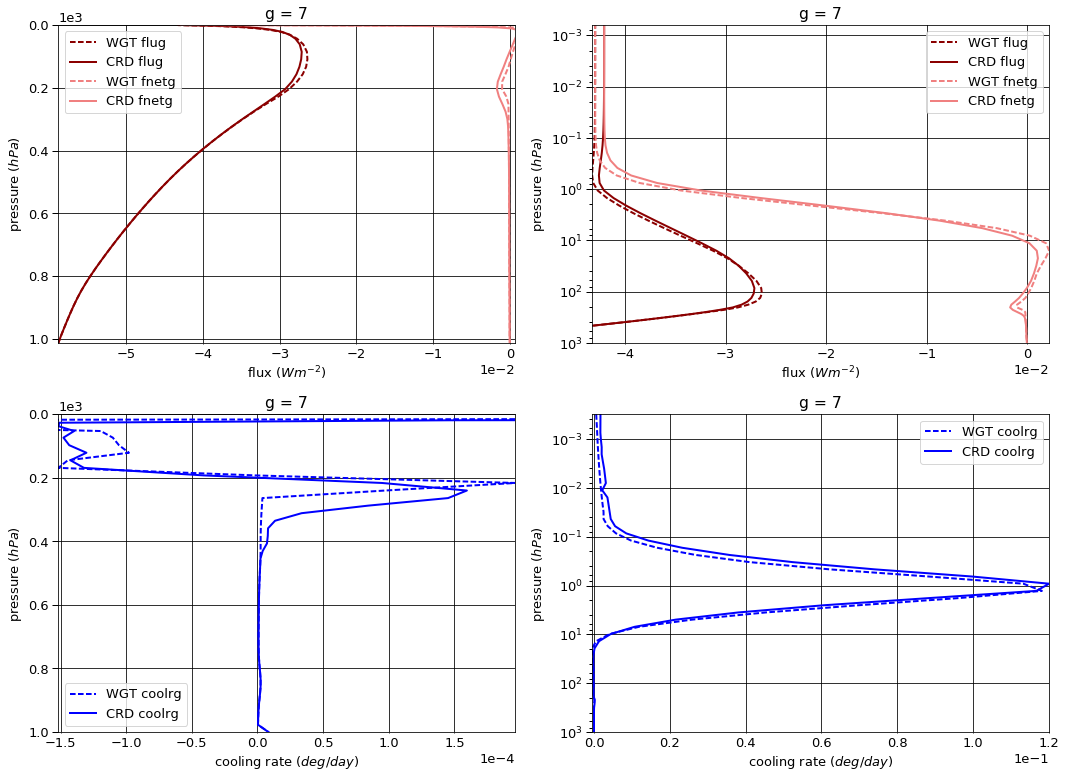

# Figure: flux, cooling rate g-group 8

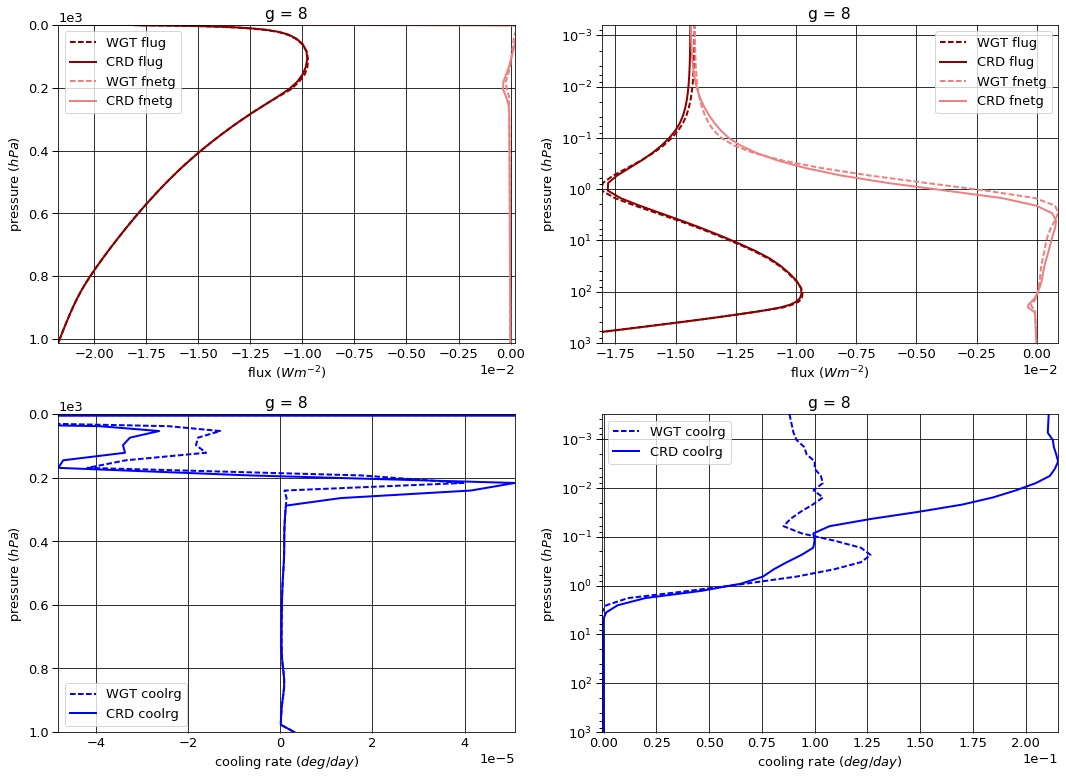

# Figure: flux, cooling rate g-group total

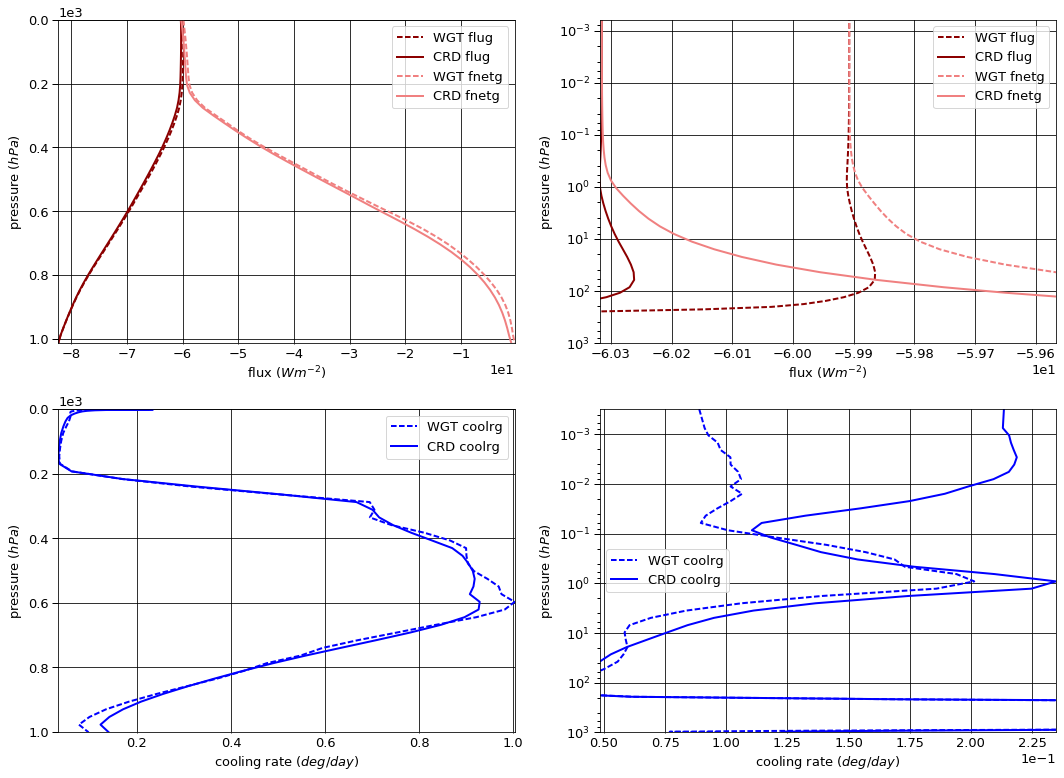

In [19]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [20]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg      fnetg
g pressure level                                 
1 0.0      1     -19.026476   0.000000 -19.026476
  1013.0   76    -22.393388  21.509672  -0.883715
2 0.0      1     -25.077502   0.000000 -25.077502
  1013.0   76    -33.329970  33.263959  -0.066011
3 0.0      1     -10.339628   0.000000 -10.339628
  1013.0   76    -15.940407  15.933919  -0.006488
4 0.0      1      -4.519807   0.000000  -4.519807
  1013.0   76     -8.013611   8.010406  -0.003205
5 0.0      1      -1.152898   0.000000  -1.152898
  1013.0   76     -2.293081   2.292175  -0.000907
6 0.0      1      -0.142048   0.000000  -0.142048
  1013.0   76     -0.264776   0.264676  -0.000100
7 0.0      1      -0.042074   0.000000  -0.042074
  1013.0   76     -0.058846   0.058822  -0.000024
8 0.0      1      -0.014380   0.000000  -0.014380
  1013.0   76     -0.021715   0.021706  -0.000009


WGT


flug       fldg      fnetg
g pressure level                                 
1 0.0      1     -18.927917   0.000000 -18.927917
  1013.0   76    -22.393388  22.097196  -0.296192
2 0.0      1     -24.907691   0.000000 -24.907691
  1013.0   76    -33.329970  33.277925  -0.052045
3 0.0      1     -10.261386   0.000000 -10.261386
  1013.0   76    -15.940407  15.933919  -0.006488
4 0.0      1      -4.487810   0.000000  -4.487810
  1013.0   76     -8.013611   8.010406  -0.003205
5 0.0      1      -1.123063   0.000000  -1.123063
  1013.0   76     -2.293081   2.292175  -0.000907
6 0.0      1      -0.142365   0.000000  -0.142365
  1013.0   76     -0.264776   0.264676  -0.000100
7 0.0      1      -0.042968   0.000000  -0.042968
  1013.0   76     -0.058846   0.058822  -0.000024
8 0.0      1      -0.014206   0.000000  -0.014206
  1013.0   76     -0.021715   0.021706  -0.000009


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1      0.098559  0.000000  0.098559
  1013.0   76     0.000000  0.587524  0.587524
2 0.0      1      0.169811  0.000000  0.169811
  1013.0   76     0.000000  0.013966  0.013966
3 0.0      1      0.078242  0.000000  0.078242
  1013.0   76     0.000000  0.000000  0.000000
4 0.0      1      0.031997  0.000000  0.031997
  1013.0   76     0.000000  0.000000  0.000000
5 0.0      1      0.029835  0.000000  0.029835
  1013.0   76     0.000000  0.000000  0.000000
6 0.0      1     -0.000317  0.000000 -0.000317
  1013.0   76     0.000000  0.000000  0.000000
7 0.0      1     -0.000894  0.000000 -0.000894
  1013.0   76     0.000000  0.000000  0.000000
8 0.0      1      0.000174  0.000000  0.000174
  1013.0   76     0.000000  0.000000  0.000000

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -3.705716e-07
  1001.112500 75     1.126823e-01
2 0.000312    1      3.366149e-05
  1001.112500 75     2.363739e-02
3 0.000312    1      1.917634e-04
  1001.112500 75     2.344188e-03
4 0.000312    1      5.526169e-04
  1001.112500 75     1.157829e-03
5 0.000312    1      3.724381e-05
  1001.112500 75     3.276217e-04
6 0.000312    1      1.707274e-06
  1001.112500 75     3.600515e-05
7 0.000312    1      1.716427e-03
  1001.112500 75     8.593242e-06
8 0.000312    1      2.109479e-01
  1001.112500 75     3.162839e-06


WGT


coolrg
g pressure    layer              
1 0.000312    1     -1.047111e-07
  1001.112500 75     7.331279e-02
2 0.000312    1      6.269264e-06
  1001.112500 75     2.019122e-02
3 0.000312    1      5.879890e-05
  1001.112500 75     2.343710e-03
4 0.000312    1      2.112490e-04
  1001.112500 75     1.157829e-03
5 0.000312    1      1.498833e-05
  1001.112500 75     3.276217e-04
6 0.000312    1      9.302272e-07
  1001.112500 75     3.600515e-05
7 0.000312    1      5.921548e-04
  1001.112500 75     8.593242e-06
8 0.000312    1      8.807435e-02
  1001.112500 75     3.162839e-06


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      2.658605e-07
  1001.112500 75    -3.936951e-02
2 0.000312    1     -2.739223e-05
  1001.112500 75    -3.446177e-03
3 0.000312    1     -1.329645e-04
  1001.112500 75    -4.781000e-07
4 0.000312    1     -3.413678e-04
  1001.112500 75     0.000000e+00
5 0.000312    1     -2.225549e-05
  1001.112500 75     0.000000e+00
6 0.000312    1     -7.770464e-07
  1001.112500 75     0.000000e+00
7 0.000312    1     -1.124273e-03
  1001.112500 75     0.000000e+00
8 0.000312    1     -1.228735e-01
  1001.112500 75     0.000000e+00

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-60.314812,0.000000,-60.314812
1013.0,76,-82.315794,81.355335,-0.960459



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-59.907405,0.000000,-59.907405
1013.0,76,-82.315794,81.956825,-0.358969



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.407407,0.00000,0.407407
1013.0,76,0.000000,0.60149,0.601490


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.213481
1001.112500,75,0.140197



WGT


,,coolrg
pressure,layer,
0.000312,1,0.088959
1001.112500,75,0.097381



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.124522
1001.112500,75,-0.042816


In [21]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.257000,0.263601
2,0.403250,0.405308
3,0.202325,0.197769
4,0.103025,0.100143
5,0.029775,0.028787
6,0.003600,0.003389
7,0.000750,0.000732
8,0.000275,0.000270


In [22]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,0.000000e+00
2,3.705815e-23
3,3.451568e-22
4,3.214764e-21
5,2.994207e-20
6,2.788782e-19
7,1.817172e-19
8,3.060940e-18


In [23]:
def spreadsheet():
    ng = 8
    ighigh = 7
    pref_1, pref_2 = 1, 500
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom.loc[3:ng] / df_abscom_copy.loc[3:ng]
    df_absratio.columns = ['k(ig+1)/k(ig)']

    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    df_pref = pd.DataFrame((pref_1 * (df_dgdgs.index >= ighigh)
                            + pref_2 * (df_dgdgs.index < ighigh)),
                           index=df_dgdgs.index, columns=['pref'])    
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [24]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig+1)/k(ig),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,0.000000e+00,NaN,0.257000,0.263601,0.257000,0.263601,500
2,3.705815e-23,NaN,0.403250,0.405308,0.660250,0.668910,500
3,3.451568e-22,9.313924,0.202325,0.197769,0.862575,0.866678,500
4,3.214764e-21,9.313924,0.103025,0.100143,0.965600,0.966821,500
5,2.994207e-20,9.313924,0.029775,0.028787,0.995375,0.995608,500
6,2.788782e-19,9.313924,0.003600,0.003389,0.998975,0.998998,500
7,1.817172e-19,0.651601,0.000750,0.000732,0.999725,0.999730,1
8,3.060940e-18,16.844524,0.000275,0.000270,1.000000,1.000000,1


In [25]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')